In [1]:
import random
import numpy as np 
from scipy.stats import binom
from matplotlib import pyplot as plt
random.seed()

/home/houwaart/conda/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg/pkg_resources/__init__.py:1248: UserWarning: /home/houwaart/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
def e_step (theta,x):
    ez = {}
    for i in ['a','b']:
        ez[i] = []
        for j in range(0,len(x)):
            s = binom.pmf(x[j],10,theta['a']) + binom.pmf(x[j],10,theta['b'])
            ez[i].append(binom.pmf(x[j],10,theta[i])/s)
    return ez


In [3]:
def m_step(ez,x):
    num = {'a':0, 'b':0}
    new_theta = {'a':0, 'b':0}
    den = {'a':0, 'b':0}
    for i in ['a','b']:
        for j in range(0,len(x)):
            num[i] += ez[i][j]*x[j]
            den[i] += ez[i][j]
        new_theta[i] = num[i]/10/den[i]
    return new_theta

In [4]:
expz = {}
expzs = {}
rounds = 10
thetas = {}
current_theta = {'a':0.6, 'b':0.5}
x = [5, 9, 8, 4, 7]
thetas[0] = current_theta

for i in range(1,rounds+1):
    expz = e_step(current_theta,x)
    expzs[i] = expz
    current_theta = m_step(expz,x)
    thetas[i] = current_theta



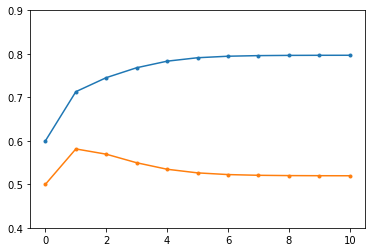

In [5]:
theta_A = [[thetas[i]['a']] for i in range(0,rounds+1)]
theta_B = [[thetas[i]['b']] for i in range(0,rounds+1)]

plt.plot(theta_A,'.-')
plt.plot(theta_B,'.-')
plt.ylim((0.4,0.9))
plt.show()

